In [79]:
import pandas as pd 
import os

# List files in the directory
print(os.listdir(r'C:\Users\hp\Downloads\archive (1)'))
import os
print(os.getcwd())
import pandas as pd
import os

# List files to check if 'togo-dapaong_qc.csv' exists
print(os.listdir(r'C:\Users\hp\Downloads\archive (1)'))
#laod the dataset 
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (1)\sentimentdataset.csv', encoding='latin-1')
# Display the first few rows of the dataset
print(df.head())



['387-2-english-vocabulary-in-use-pre-intermediate-and-intermediate-redman-2017-4th-264p-sayfalar-silindi-3br9.pdf', 'English for Everyone. Grammar Guide. Practice Book.pdf', 'sentimentdataset.csv']
c:\Users\hp\Documents\Visual Studio 2017\Future_DS_01\notebooks
['387-2-english-vocabulary-in-use-pre-intermediate-and-intermediate-redman-2017-4th-264p-sayfalar-silindi-3br9.pdf', 'English for Everyone. Grammar Guide. Practice Book.pdf', 'sentimentdataset.csv']
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! ðª       ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Tr

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
df.dropna(subset=['Text', 'Sentiment', 'Platform'], inplace=True)

In [82]:
df.fillna({'Likes': 0, 'Retweets': 0}, inplace=True)  # Example of filling

In [83]:
df['Sentiment'] = df['Sentiment'].str.lower()  # Lowercase Sentiment
df['Platform'] = df['Platform'].str.lower()    # Lowercase Platform
df['Text'] = df['Text'].str.lower()            # Lowercase Text (if needed)

In [84]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Text'] = df['Text'].str.strip()

In [85]:
df.to_csv('cleaned_social_media_data.csv', index=False)

In [86]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [87]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the cleaned dataset
df = pd.read_csv('cleaned_social_media_data.csv')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Compute VADER sentiment scores
df['VADER_Score'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify VADER scores into broader categories
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['VADER_Score'].apply(classify_sentiment)

# Compare VADER scores with dataset’s Sentiment labels
comparison = df[['Sentiment', 'VADER_Sentiment']].value_counts().reset_index(name='Count')

# Check the comparison results
print(comparison)


                Sentiment VADER_Sentiment  Count
0                     joy        Positive     35
1              excitement        Positive     31
2                positive        Positive     28
3             contentment        Positive     19
4                positive         Neutral     16
..                    ...             ...    ...
232     thrilling journey        Positive      1
233          winter magic        Positive      1
234  whispers of the past         Neutral      1
235            wonderment        Positive      1
236                wonder        Positive      1

[237 rows x 3 columns]


In [88]:
monthly_engagement = df.groupby(['Year', 'Month']).agg({'Likes': 'mean', 'Retweets': 'mean'}).reset_index()

In [89]:
# Check the data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     732 non-null    int64  
 1   Unnamed: 0       732 non-null    int64  
 2   Text             732 non-null    object 
 3   Sentiment        732 non-null    object 
 4   Timestamp        732 non-null    object 
 5   User             732 non-null    object 
 6   Platform         732 non-null    object 
 7   Hashtags         732 non-null    object 
 8   Retweets         732 non-null    float64
 9   Likes            732 non-null    float64
 10  Country          732 non-null    object 
 11  Year             732 non-null    int64  
 12  Month            732 non-null    int64  
 13  Day              732 non-null    int64  
 14  Hour             732 non-null    int64  
 15  VADER_Score      732 non-null    float64
 16  VADER_Sentiment  732 non-null    object 
dtypes: float64(3), i

In [90]:
import pandas as pd
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

In [91]:
# 1. Aggregate posts by Year and Month
monthly_engagement = df.groupby(['Year', 'Month']).agg({'Likes': 'mean', 'Retweets': 'mean'}).reset_index()


In [92]:
# Calculate total engagement as Likes + Retweets
monthly_engagement['Total_Engagement'] = monthly_engagement['Likes'] + monthly_engagement['Retweets']

In [93]:
# Create a DateTime column for plotting
monthly_engagement['Date'] = pd.to_datetime(monthly_engagement[['Year', 'Month']].assign(Day=1))

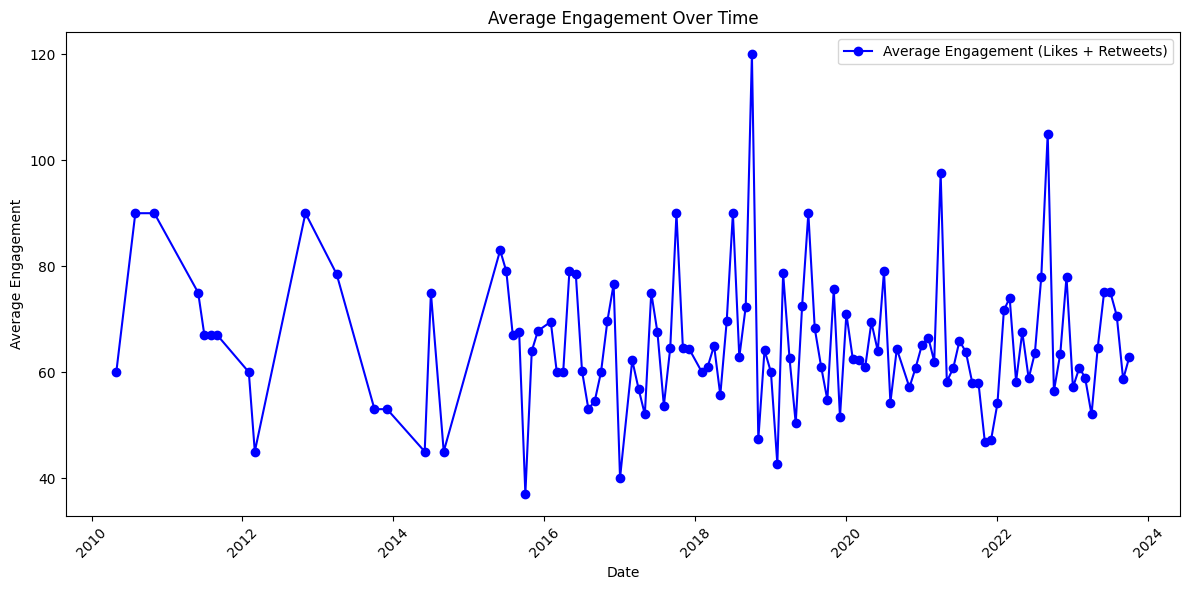

In [94]:
#2. Visualization of Average Engagement Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Date'], monthly_engagement['Total_Engagement'], marker='o', color='blue', label='Average Engagement (Likes + Retweets)')
plt.title('Average Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('average_engagement_over_time.png')
plt.show()

In [95]:
# Check for and handle missing values
df.dropna(inplace=True) 
# Strip whitespace from text fields
df['Text'] = df['Text'].str.strip()

In [96]:
import pandas as pd
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

In [97]:
sentiment_counts = df['Sentiment'].value_counts()

In [ ]:
country_sentiment = df.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
country_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution_by_country.png')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3039951811.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3039951811.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3039951811.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('sentiment_distribution_by_country.png')


<Figure size 1200x600 with 0 Axes>

c:\Users\hp\Documents\Visual Studio 2017\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
monthly_engagement['Date'] = pd.to_datetime(monthly_engagement[['Year', 'Month']].assign(Day=1))

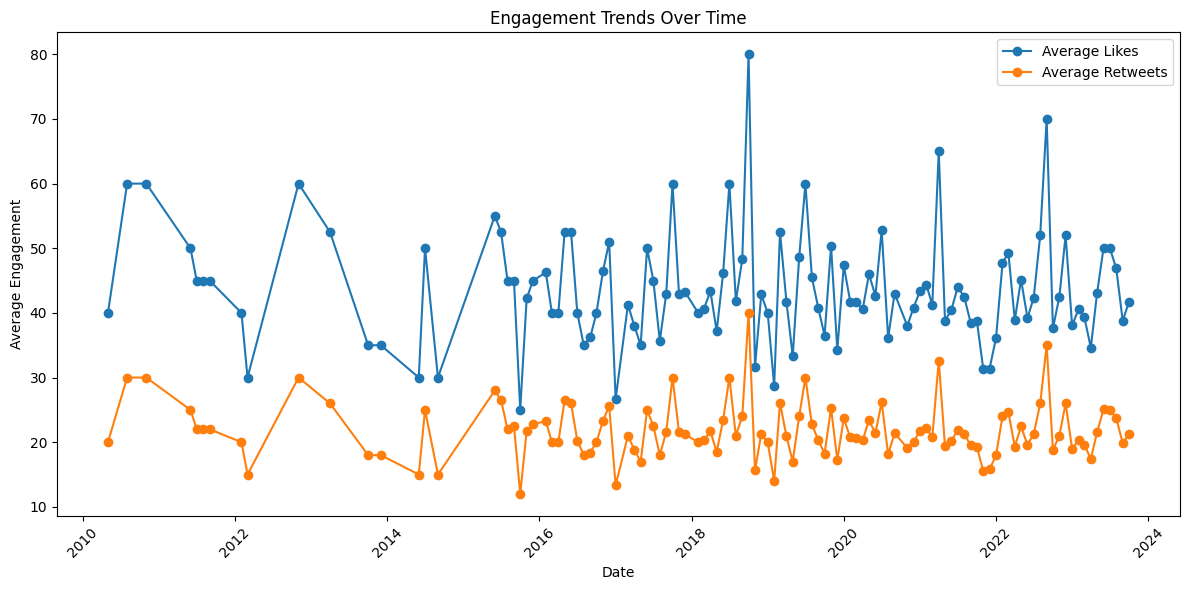

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Date'], monthly_engagement['Likes'], marker='o', label='Average Likes')
plt.plot(monthly_engagement['Date'], monthly_engagement['Retweets'], marker='o', label='Average Retweets')
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('engagement_trends_line_chart.png')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3516248849.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


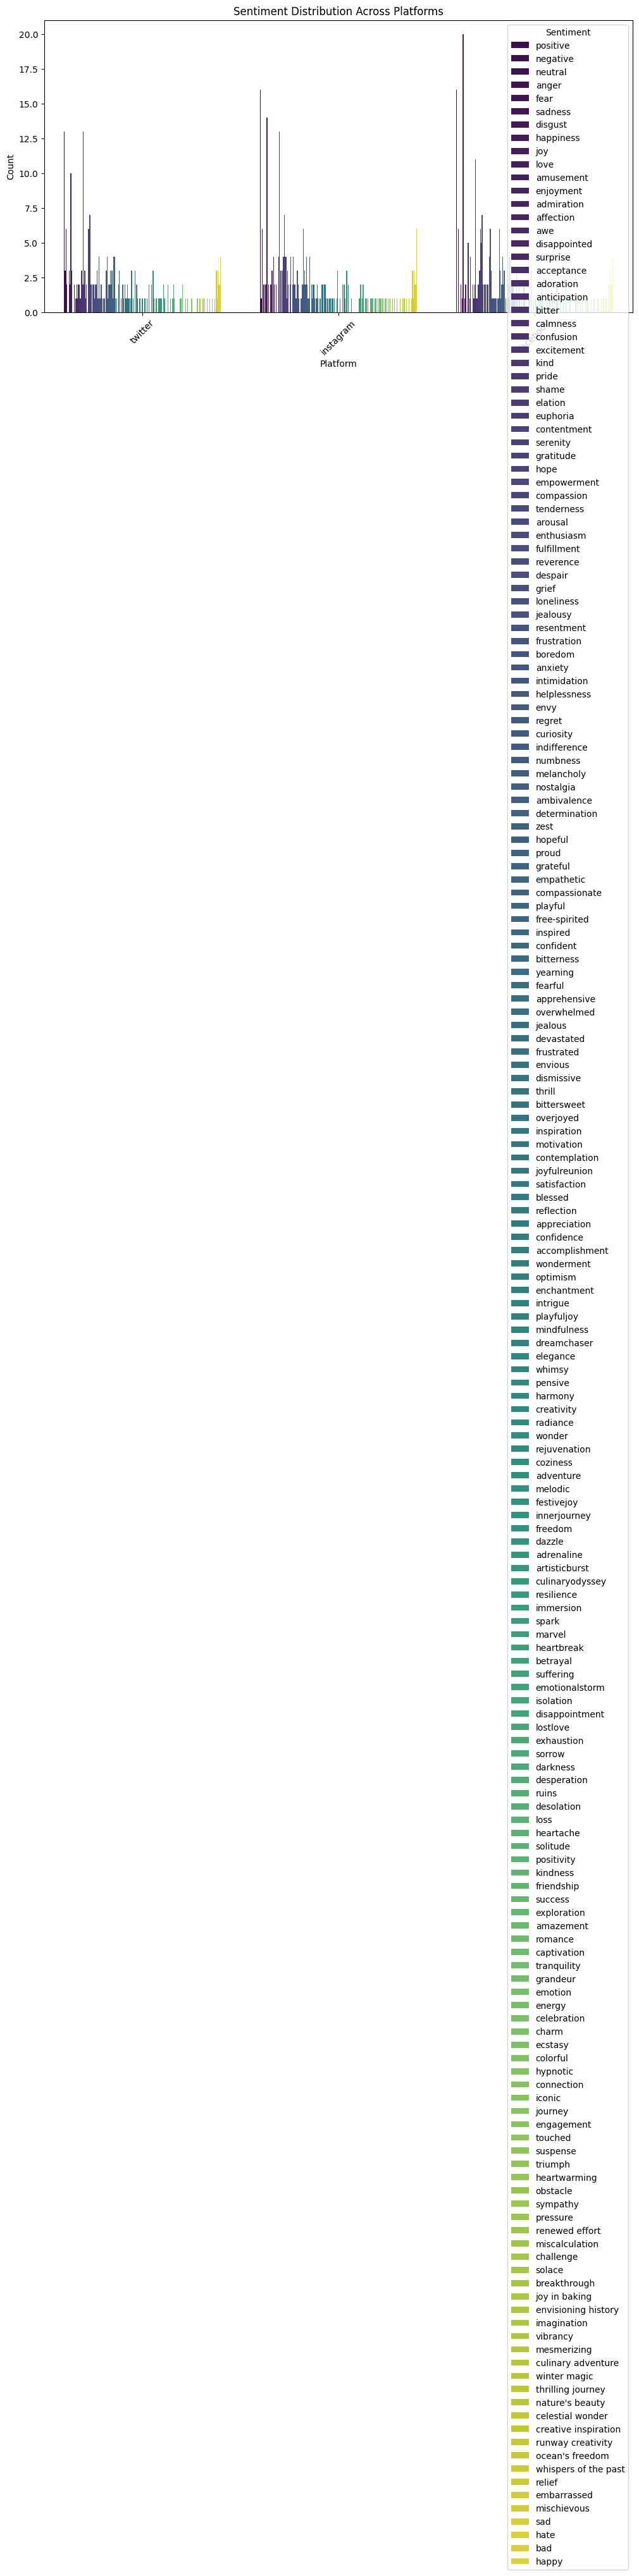

In [ ]:
# 1. Compare Sentiment Distribution Across Platforms
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution_platforms.png')
plt.show()

In [ ]:
# 2. Compute Average Likes and Retweets per Platform
platform_engagement = df.groupby('Platform').agg({'Likes': 'mean', 'Retweets': 'mean'}).reset_index()

# Melt the DataFrame for easier plotting
platform_engagement_melted = platform_engagement.melt(id_vars='Platform', value_vars=['Likes', 'Retweets'],
                                                       var_name='Engagement Type', value_name='Average')

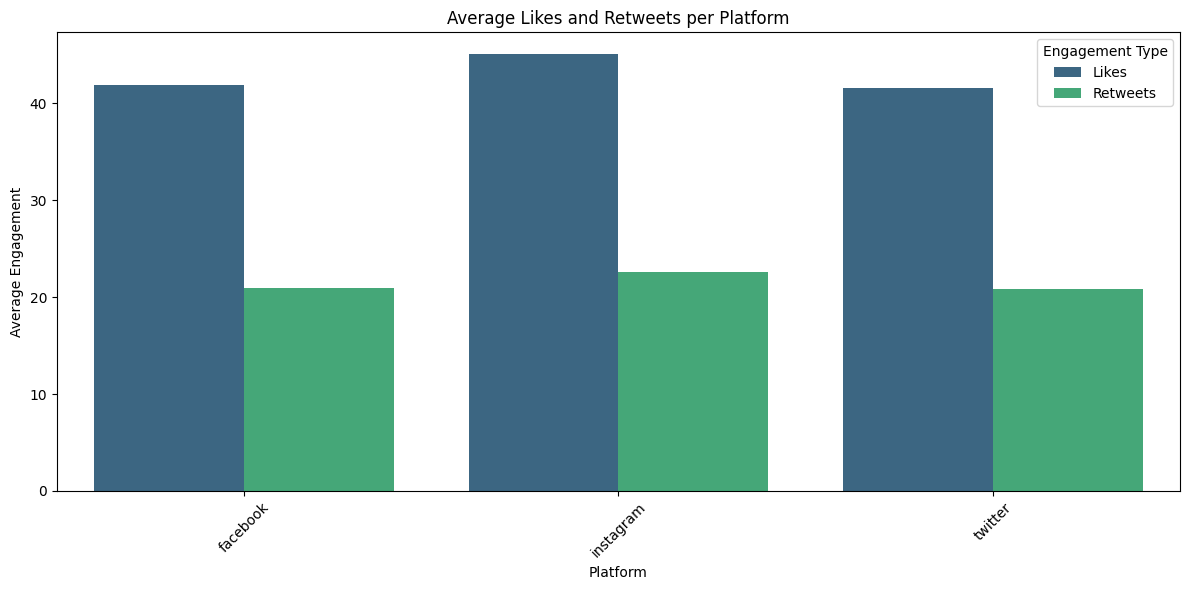

In [ ]:
# Visualization of Average Likes and Retweets per Platform
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_engagement_melted, x='Platform', y='Average', hue='Engagement Type', palette='viridis')
plt.title('Average Likes and Retweets per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Engagement Type')
plt.tight_layout()
plt.savefig('average_engagement_per_platform.png')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3268286905.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3268286905.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3268286905.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('sentiment_distribution_by_country.png')


<Figure size 1200x600 with 0 Axes>

c:\Users\hp\Documents\Visual Studio 2017\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


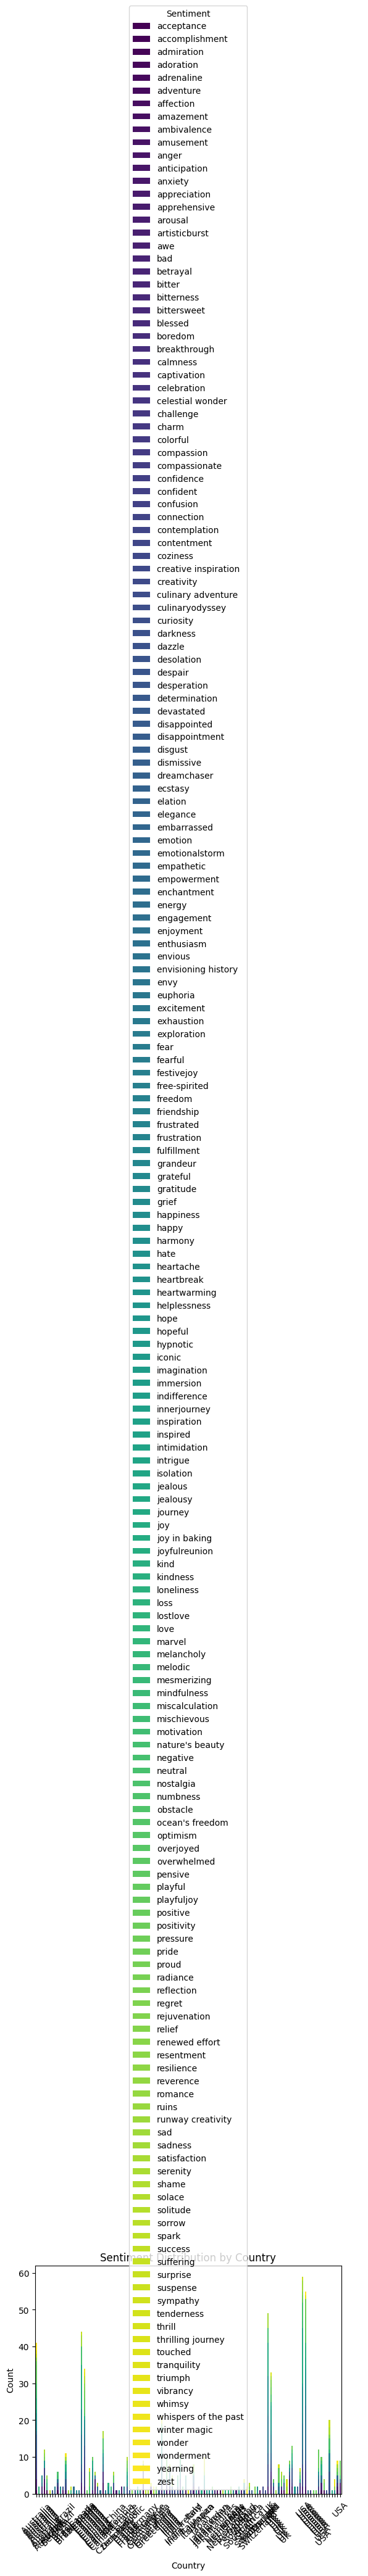

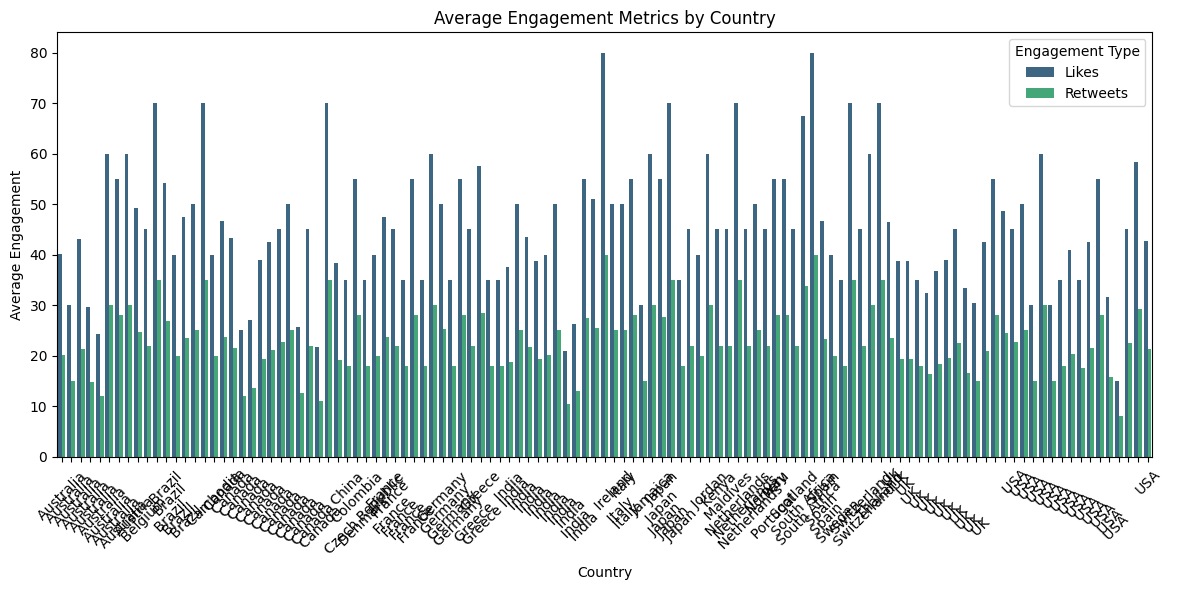

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_social_media_data.csv')

# 1. Group Posts by Country to Analyze Sentiment Distribution
country_sentiment = df.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
country_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution_by_country.png')
plt.show()

# 2. Visualize Engagement Metrics by Country
# Calculate average likes and retweets by country
country_engagement = df.groupby('Country').agg({'Likes': 'mean', 'Retweets': 'mean'}).reset_index()

# Melt the DataFrame for easier plotting
country_engagement_melted = country_engagement.melt(id_vars='Country', value_vars=['Likes', 'Retweets'],
                                                     var_name='Engagement Type', value_name='Average')

plt.figure(figsize=(12, 6))
sns.barplot(data=country_engagement_melted, x='Country', y='Average', hue='Engagement Type', palette='viridis')
plt.title('Average Engagement Metrics by Country')
plt.xlabel('Country')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Engagement Type')
plt.tight_layout()
plt.savefig('engagement_metrics_by_country.png')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3356044930.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

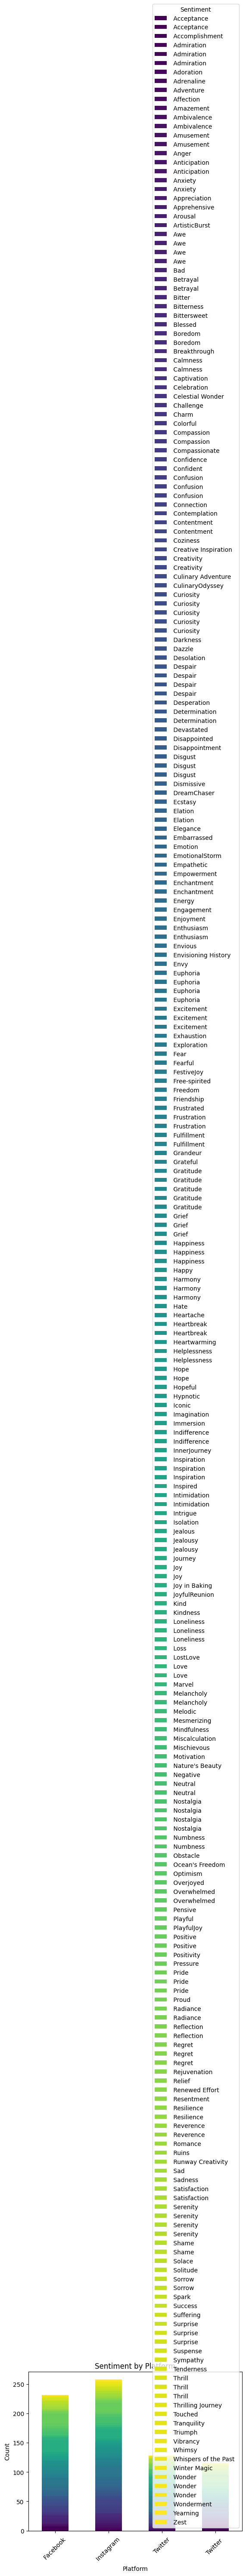

In [ ]:
platform_sentiment = df.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
platform_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_by_platform_bar_chart.png')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3856304044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


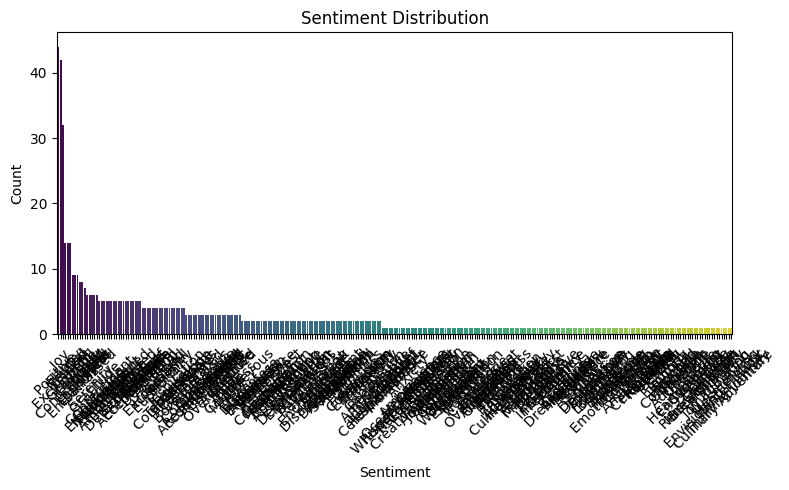

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_sentiment = df.groupby(['Year', 'Month', 'Sentiment']).agg({'Likes': 'mean'}).reset_index()

In [ ]:
pivot_table = monthly_sentiment.pivot(index=['Year', 'Month'], columns='Sentiment', values='Likes').fillna(0)


C:\Users\hp\AppData\Local\Temp\ipykernel_26536\3585896428.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


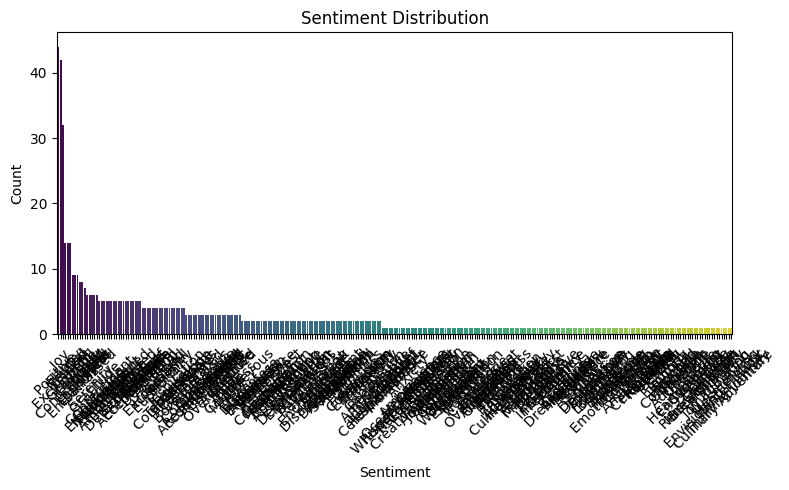

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26536\458881656.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


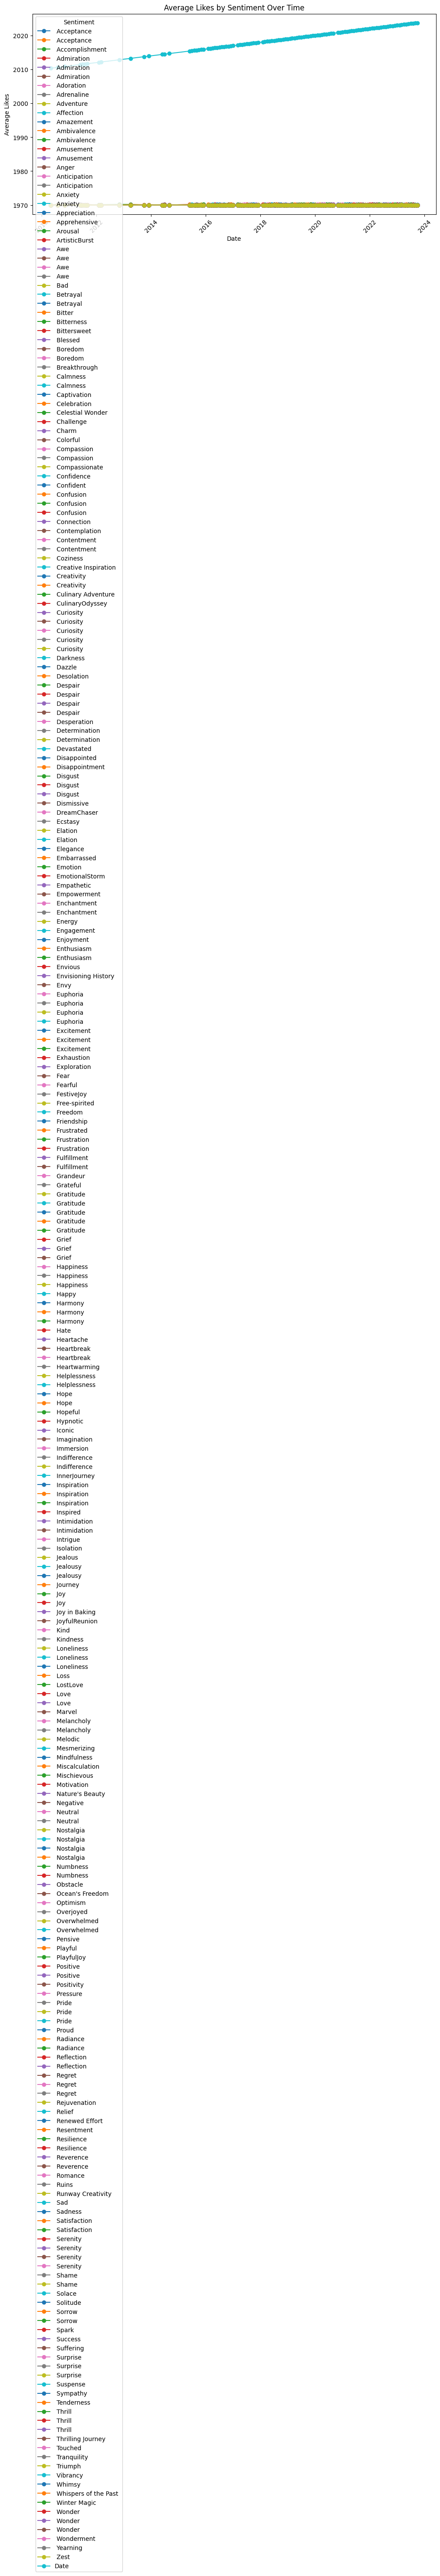

In [ ]:
monthly_sentiment = df.groupby(['Year', 'Month', 'Sentiment']).agg({'Likes': 'mean'}).reset_index()


# Create a pivot table for visualization
pivot_table = monthly_sentiment.pivot(index=['Year', 'Month'], columns='Sentiment', values='Likes').fillna(0)
pivot_table.reset_index(inplace=True)
pivot_table['Date'] = pd.to_datetime(pivot_table[['Year', 'Month']].assign(Day=1))
plt.figure(figsize=(12, 6))
for sentiment in pivot_table.columns[2:]:  # Skip Year, Month
    plt.plot(pivot_table['Date'], pivot_table[sentiment], marker='o', label=sentiment)
plt.title('Average Likes by Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Polarity'] = df['Text'].apply(get_sentiment)

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Polarity'].apply(categorize_sentiment)


['387-2-english-vocabulary-in-use-pre-intermediate-and-intermediate-redman-2017-4th-264p-sayfalar-silindi-3br9.pdf', 'English for Everyone. Grammar Guide. Practice Book.pdf', 'sentimentdataset.csv']
c:\Users\hp\Documents\Visual Studio 2017\Future_DS_01\notebooks
['387-2-english-vocabulary-in-use-pre-intermediate-and-intermediate-redman-2017-4th-264p-sayfalar-silindi-3br9.pdf', 'English for Everyone. Grammar Guide. Practice Book.pdf', 'sentimentdataset.csv']
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! ðª       ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Tr

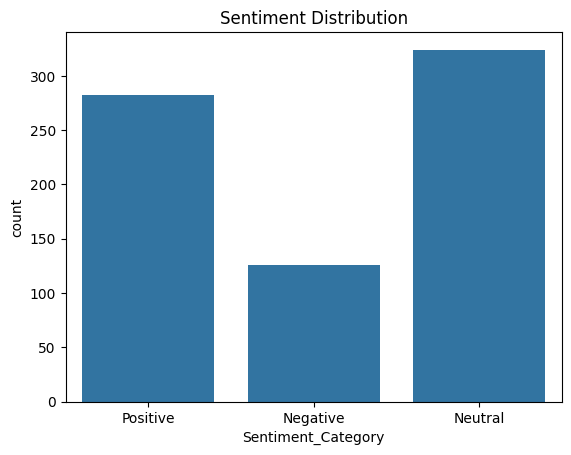

In [ ]:
import pandas as pd 
import os

# List files in the directory
print(os.listdir(r'C:\Users\hp\Downloads\archive (1)'))
import os
print(os.getcwd())
import pandas as pd
import os

# List files to check if 'togo-dapaong_qc.csv' exists
print(os.listdir(r'C:\Users\hp\Downloads\archive (1)'))
#laod the dataset 
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (1)\sentimentdataset.csv', encoding='latin-1')
# Display the first few rows of the dataset
print(df.head())
 # Check the data types and null values
print(df.info())
# Check for and handle missing values
df.dropna(inplace=True) 
# Strip whitespace from text fields
df['Text'] = df['Text'].str.strip()
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Polarity'] = df['Text'].apply(get_sentiment)


df['Sentiment_Category'] = df['Polarity'].apply(categorize_sentiment)

import matplotlib.pyplot as plt
import seaborn as sns

# Count of sentiments
sns.countplot(data= df, x='Sentiment_Category')
plt.title('Sentiment Distribution')
plt.show()


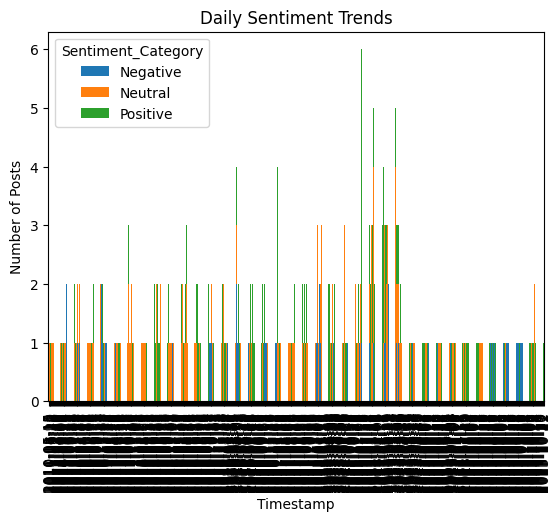

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by date and sentiment
daily_sentiment = df.groupby(df['Timestamp'].dt.date)['Sentiment_Category'].value_counts().unstack()

# Plot daily sentiment trends
daily_sentiment.plot(kind='bar', stacked=True)
plt.title('Daily Sentiment Trends')
plt.ylabel('Number of Posts')
plt.show()


In [ ]:
df.to_csv('processed_data.csv', index=False)
